In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Chapter 1
## 1.1 Waveguide Structure


In [3]:
n1 = 1.46  # Core (higher than cladding)
n0 = 1.455  # Cladding

# Max theta incident on waveguide for TIRF/ light acceptance angle in degrees:
thetaMax = np.degrees(np.arcsin(np.sqrt(n1**2 - n0**2)))
thetaMax 

6.934059620490947

In [4]:
delta = (n1**2 - n0**2) / (2*n1**2)  # Relative refractive-index difference
NA = n1*(2*delta)**0.5  # or thetaMax in radians
delta, NA

(0.0034187933946329845, 0.12072696467649362)

In [5]:
phi_max = np.arcsin(np.sqrt(n1**2 - n0**2)/n1) ; phi_max

0.082784225967807948

## 1.2 Formation of Guided Modes
Even at angles smaller than the critical angle, arbitrary angles are not able to propagate in a waveguide. Each mode is associated with light rays at a discrete angle of propagation as given by EM wave analysis.

In [6]:
# Inside the core for a plane wave propagating along z with angle phi:
lambda_0 = 1.54      # Free space wavelength (um) 
lam = lambda_0 / n1  # Wavelength inside the core
lam

1.0547945205479452

In [7]:
k = 2*np.pi / lam  # Wavenumber in core

phi = np.radians(30)          # Propagation angle inside core (can work out from theta with snells law)
beta = k * n1 * np.cos(phi)   # Propagation constant in z
kappa = k * n1 * np.sin(phi)  # Propagation constant in x (laterial direction)

In [8]:
phi, beta, kappa

(0.52359877559829882, 7.5317429703928411, 4.3484538314233774)

In [9]:
# Condition for propagation angle phi (1.12)
lam_p = 2*np.pi / beta; lam_p  # Wavelength period along z

0.83422726079191567

In [10]:
eps = np.sin(phi_max) / np.sqrt(2*delta); eps  # 1.13

1.0

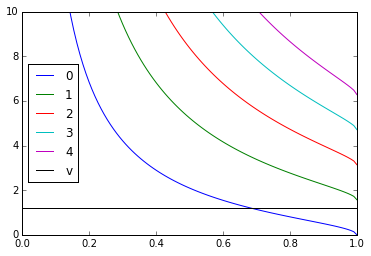

In [34]:
a = 3.54/2  # Half depth of waveguide (um)
mode = 5 # Mode numbers to plot

eps = np.linspace(0.1,1, 100)
v = k*n1*a*np.sqrt(2*delta)  # Normalised frequency (LHS dispersion eqn)

for m in range(mode):
    nu = (np.arccos(eps) + m*np.pi / 2 ) / eps  # (RHS dispersion eqn)
    plt.plot(eps,nu, label=m)

plt.axhline(v, color='black', label='v')
plt.xlim(0,1);
plt.ylim(0,10);
plt.legend(loc='best');

In [35]:
# delta = 0.3/100

vc = np.pi / 2
lam_c = (2*np.pi / vc) * a * n1 * np.sqrt(2*delta)  # (1.16)
print('Single Mode Waveguide for lambda > %.2f um' % lam_c)

if v <= np.pi/2:
    print('Single Mode Achieved. Core wavelength: %.2f' % lam) 
else:
    print('Simulation not single mode')

Single Mode Waveguide for lambda > 0.80 um
Single Mode Achieved. Core wavelength: 1.05


# 1.3 Maxwell's Equations